In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
df = pd.read_csv("fake_job_postings.csv")

In [39]:
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())


Shape of dataset: (17880, 19)

Columns: ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent', 'desc_len']

Missing Values:
 job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
desc_len                   0
dtype: int64


In [40]:
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n")
display(df.head())

Dataset Shape: (17880, 19)

Columns:
 ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent', 'desc_len']

Data Types:
 job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
desc_len                int64
dtype: object

First 5 Rows:



,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,desc_len
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,905
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,2077
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,355
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,2600
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,1520


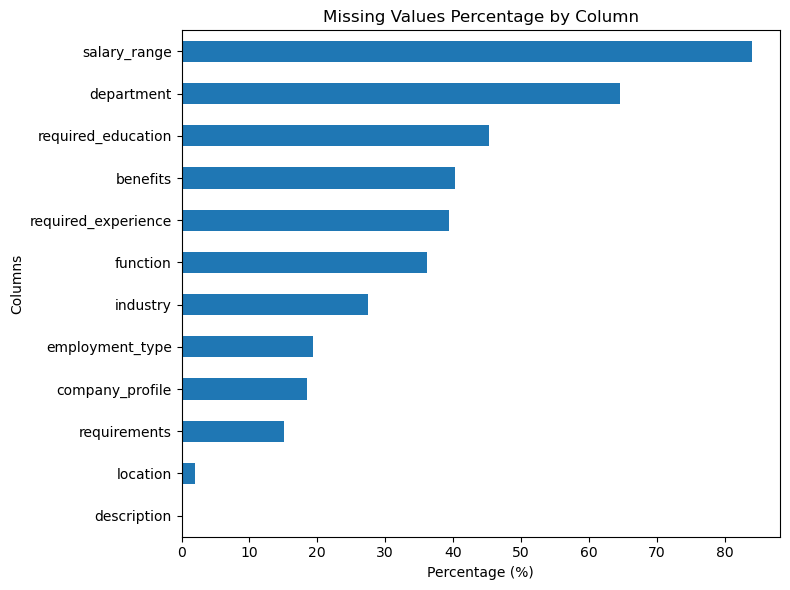

In [27]:
# Missing Values Percentage Plot
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values(ascending=True)
plt.figure(figsize=(8,6))
missing.plot(kind='barh')
plt.title("Missing Values Percentage by Column")
plt.xlabel("Percentage (%)")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()

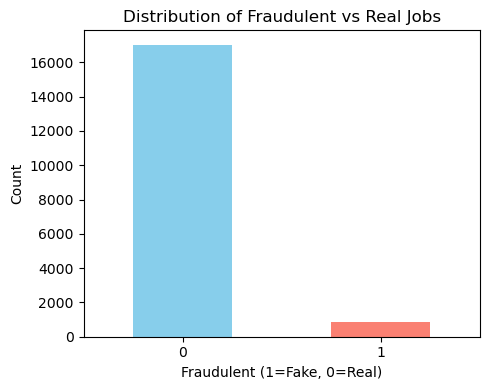

In [28]:

plt.figure(figsize=(5,4))
df['fraudulent'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Distribution of Fraudulent vs Real Jobs")
plt.xlabel("Fraudulent (1=Fake, 0=Real)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

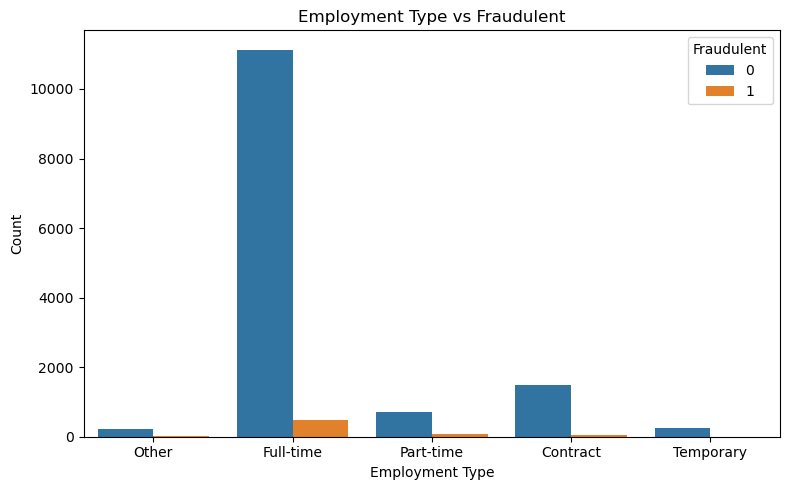

In [29]:

if 'employment_type' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(x='employment_type', hue='fraudulent', data=df)
    plt.title("Employment Type vs Fraudulent")
    plt.xlabel("Employment Type")
    plt.ylabel("Count")
    plt.legend(title="Fraudulent")
    plt.tight_layout()
    plt.show()

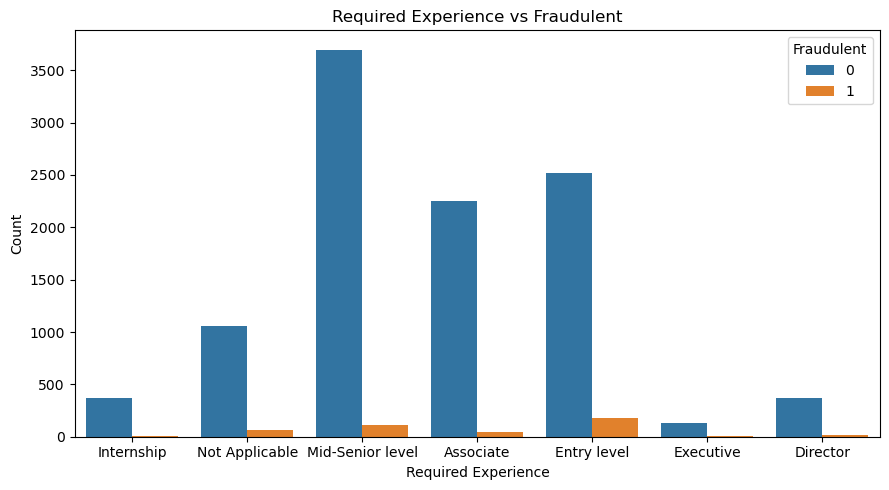

In [30]:

if 'required_experience' in df.columns:
    plt.figure(figsize=(9,5))
    sns.countplot(x='required_experience', hue='fraudulent', data=df)
    plt.title("Required Experience vs Fraudulent")
    plt.xlabel("Required Experience")
    plt.ylabel("Count")
    plt.legend(title="Fraudulent")
    plt.tight_layout()
    plt.show()

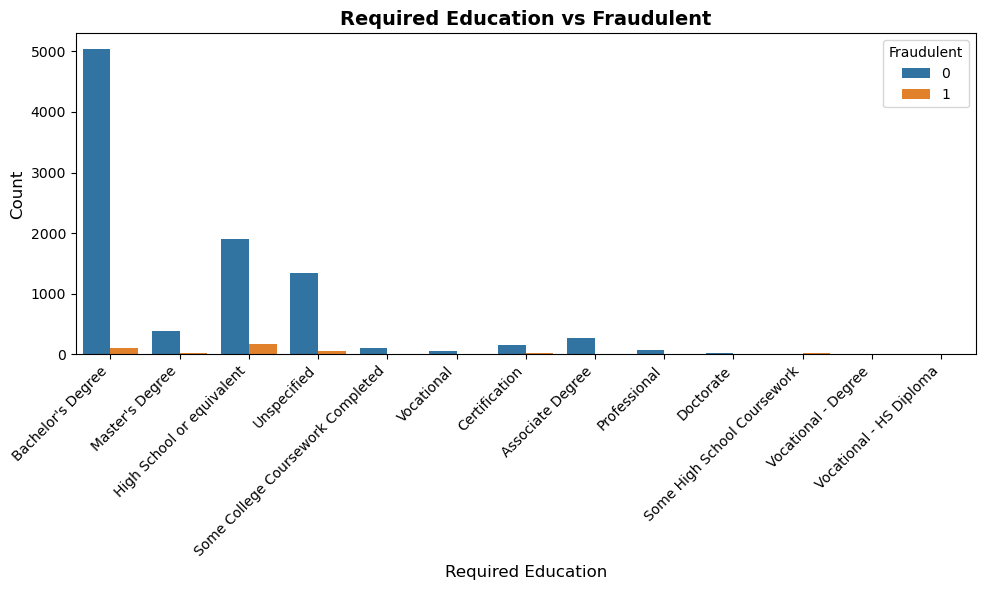

In [31]:
if 'required_education' in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(x='required_education', hue='fraudulent', data=df)
    plt.title("Required Education vs Fraudulent", fontsize=14, fontweight='bold')
    plt.xlabel("Required Education", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(title="Fraudulent")
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()
    plt.show()


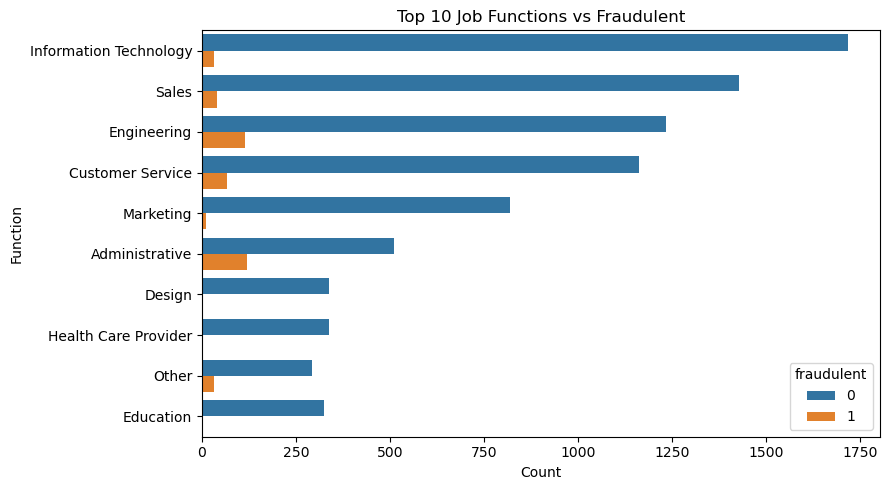

In [32]:

if 'function' in df.columns:
    top_func = df['function'].value_counts().head(10).index
    plt.figure(figsize=(9,5))
    sns.countplot(y='function', hue='fraudulent', data=df[df['function'].isin(top_func)], order=top_func)
    plt.title("Top 10 Job Functions vs Fraudulent")
    plt.xlabel("Count")
    plt.ylabel("Function")
    plt.tight_layout()
    plt.show()


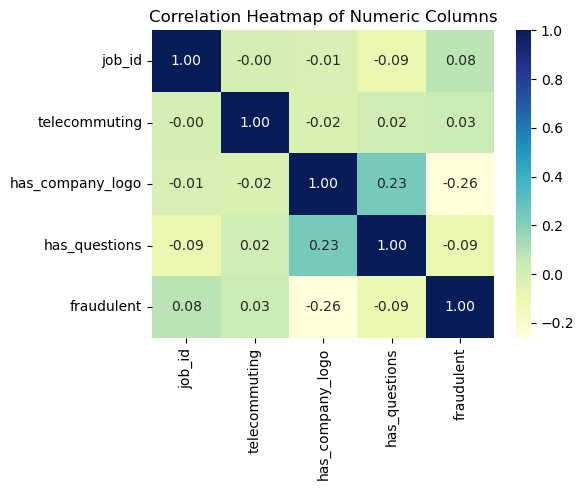

In [37]:

if len(num_cols) > 1:
    plt.figure(figsize=(6,5))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title("Correlation Heatmap of Numeric Columns")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")
    

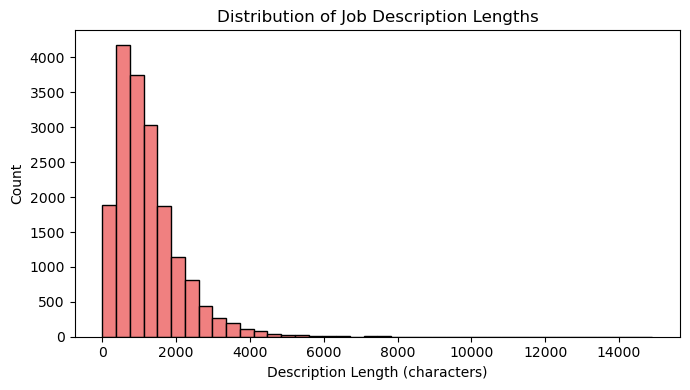

In [34]:
if 'description' in df.columns:
    df['desc_len'] = df['description'].fillna("").apply(len)
    plt.figure(figsize=(7,4))
    plt.hist(df['desc_len'], bins=40, color='lightcoral', edgecolor='black')
    plt.title("Distribution of Job Description Lengths")
    plt.xlabel("Description Length (characters)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
